# Chapter2. 딥러닝

- 딥러닝은 머신러닝 알고리즘의 한 종류
- 데이터 처리 유닛의 층을 여러 개 쌓아 구조적이지 않은 데이터로부터 고수준 표현을 학습

## 2.1 정형 데이터와 비정형 데이터

- 정형 데이터
    - 테이블 형태
    - 각 샘플을 설명하는 특성이 열(column)로 표현
    - 이런 특성으로 형태가 갖춰진 데이터를 이용하여 결과 출력(예측)
    - 모델은 이런 특성이 출력에 어떻게 영향을 미치는지 학습
- 비정형 데이터
    - 이미지, 소리, 텍스트와 같이 특성의 열로 구성할 수 없는 데이터
    - 픽셀, 진동수, 문자 각 요소들은 아무런 정보를 가지고 있지 않다
    - 그러나 이 점들이 모여 굴뚝 이미지나 striker 단어 같은 정보가 담긴 고수준 특성을 구성
    - 데이터의 구성 요소가 고차원 공간에서 의존성을 가지고 연결되어 있어 픽셀이나 문자를 독자적인 정보를 가진 특성으로 사용할 수 없다
<br>
<br> 
- 로지스틱 회귀, 랜덤 포레스트, XGBoost 알고리즘들은 정보가 담겨 있고 공간 의존성이 없는 입력 특성을 기대
- 딥러닝 모델은 비정형 데이터로부터 직접 고수준 정보를 가진 특성을 만드는 방법을 스스로 학습할 수 있다

## 2.2 심층 신경망

- 대부분의 딥러닝 시ㅡ템은 여러 개의 은닉 층을 쌓은 인공신경망
- 이런 이유로 딥러닝이 심층 신경망과 거의 동의어가 되었다
- 심층신경망은 층을 연속하여 쌓아 구성
- 층은 유닛(unit)을 가지며, 이전 층의 유닛과 가중치로 연결
- dense layer(밀집 층): 이전 층의 모든 유닛과 연결
- 층을 연속해서 쌓으면 층에 있는 유닛이 원본 입력의 복잡한 특징을 점점 잘 표현할 수 있다
- 심층신경망은 정확한 예측을 출력하기 위해 필요한 각 층의 가중치 조합을 찾는게 필요
- 이런 가중치를 찾는 과정을 훈련(training)이라 한다
- Back propagation(역전파): 출력된 값을 정답과 비교한 예측 에러가 네트워크를 통해 거꾸로 전파되어 예측을 가장 많이 향상시킬 수 있는 방향으로 가중치를 수정

## 2.3 첫 번째 심층 신경망

### 2.3.1 데이터 적재
- 사용 데이터: CIFAR-10

In [14]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets

import ssl 
ssl._create_default_https_context = ssl._create_unverified_context

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # load data

170500096/170498071 [==============================] - 632s 4us/step


In [18]:
print(f"""x_train과 x_test는 각각 {x_train.shape},{x_test.shape}크기의 numpy 배열입니다.
      y_train과 y_test는 각각 {y_train.shape}, {y_test.shape} 크기의 numpy 배열입니다.""")

x_train과 x_test는 각각 (50000, 32, 32, 3),(10000, 32, 32, 3)크기의 numpy 배열입니다.
      y_train과 y_test는 각각 (50000, 1), (10000, 1) 크기의 numpy 배열입니다.


In [28]:
x_train[54, 12, 13, 1] # 인덱스 54의 이미지, 높이와 너비가 (12,13) 위치에 해당라는 픽셀의 초록 채널(1) 값

0.36862746

In [20]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

y_train과 y_test는 각 이미지의 클래스에 해당하는 0에서 9사이의 정수 레이블

In [21]:
NUM_CLASSES = 10

In [22]:
x_train = x_train.astype('float32') / 255.0 # scaling
x_test = x_test.astype('float32') / 255.0 # scaling

- 이미지 데이터는 픽셀 채널마다 0 ~ 255 사이의 정수
- 신경망 입력이 -1과 1사이 범위에 놓여있을 때 잘 동작하기 때문에 데이터 정규화

In [29]:
y_train = to_categorical(y_train, NUM_CLASSES) # one-hot encoding
y_test = to_categorical(y_test, NUM_CLASSES) # one-hot encoding

In [30]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### 2.3.2 모델 만들기

- __Sequential 모델__
    - 일렬로 층을 쌓은 네트워크를 빠르게 만들 때 사용하기 좋다(분기 없이 이전층이 다음 층으로 바로 연결)    

In [34]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense

In [33]:
model = Sequential([
    Dense(200, activation='relu', input_shape=(32, 32, 3)),
    Flatten(),
    Dense(150, activation='relu'),
    Dense(10, activation='softmax'),
])

- __함수형 API__
    - 유연성이 좋다

In [35]:
input_layer = Input(shape=(32,32,3))

x = Flatten()(input_layer)

x = Dense(units=200, activation='relu')(x)
x = Dense(units=150, activation='relu')(x)

output_layer = Dense(units=10, activation='softmax')(x)

model = Model(input_layer, output_layer)

In [37]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_5 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


### 2.3.3 모델 컴파일

- 이 단계에서는 모델에 손실함수와 옵티마이저를 연결

In [38]:
from tensorflow.keras.optimizers import Adam

In [39]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
             metrics=['accuracy'])

F:\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


- 손실함수: 신경망의 예측 출력과 정답을 비교하는 데 사용

    - 평균 제곱 오차(Mean squared error): 회귀문제
    - 범주형 크로스 엔트로피: 샘플이 여러 클래스 중에 하나에 속해야 하는 분류 문제
    - 이진 크로스 엔트로피: 하나의 출력 유닛을 가진 이진 분류 문제 or 샘플이 여러 개의 클래스에 속할 수 있는 다중 레이블 분류 문제
    
- 옵티마이저: 손실함수의 그레디언트를 기반으로 신경망의 가중치를 업데이트하기 위해 사용하는 알고리즘

### 2.3.4 모델 훈련

In [40]:
model.fit(x_train,
         y_train,
         batch_size=32,# 훈련 스텝마다 네트워크에 전달될 샘플 개수
         epochs=10, # 네트워크가 전체 훈련 데이터에 대해 반복하여 훈련할 횟수
         shuffle=True) # 훈련 스텝마다 배치를 랜덤하게 추출

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8487 - accuracy: 0.3335
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6580 - accuracy: 0.4082
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5804 - accuracy: 0.4365
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5331 - accuracy: 0.4574
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4965 - accuracy: 0.4687
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4671 - accuracy: 0.4798
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4433 - accuracy: 0.4872
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4190 - accuracy: 0.4950
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3992 - accuracy: 0.5021
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.377

__<훈련과정>__

1. 네트워크의 가중치를 작고 랜덤한 수로 초기화
2. 연속된 훈련 스텝을 수행
    - 한 이미지 배치가 네트워크를 통과
    - 오차가 역전파되어 가중치 업데이트
    - *배치 사이즈가 클수록 그레디언트 계산은 안정적이나 훈련 스텝의 속도는 느려짐
3. 데이터셋의 모든 샘플이 사용될 때까지 계속 진행, 완료되면 첫 번째 에폭
4. 이런 과정이 지정 횟수만큼의 에폭만큼 반복 수행

### 2.3.5 모델 평가

- 모델이 훈련 세트에서 51.2%의 정확도를 달성했다. 본 적 없는 데이터(test)에서의 성능 평가를 해본다

In [42]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.4658 - accuracy: 0.4789


[1.465817928314209, 0.4788999855518341]

이 메서드의 출력은 모니터링한 측정값의 리스트이며, 여기서는 범주형 크로스 엔트로피의 손실값과 정확도이다.

predict 메서드를 사용해서 테스트 세트에 대한 예측 결과 확인 가능

In [44]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
                   'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test) # (10000, 10) 크기의 배열, 샘플마다 10개의 클래스 확률을 담은 벡터
preds_single = CLASSES[np.argmax(preds, axis=-1)] # argmax 함수를 사용해 하나의 예측 결과 출력, axis=-1은 마지막 차원으로 배열을 압축한다는 의미
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

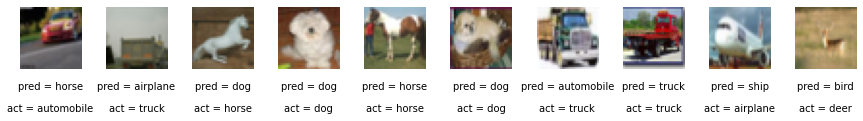

In [48]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10,
           ha = 'center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10,
           ha = 'center', transform=ax.transAxes)
    ax.imshow(img)

## 2.4 모델 성능 향상

- 앞선 네트워크가 더 높은 성능을 내지 못하는 한 가지 이유는 입력 이미지의 공간 구조를 다룰 수 있는 네트워크가 없기 때문
- 이를 위해 합성곱 층(Convolution layer)을 사용해야 한다

### 2.4.1 합성곱 층

- 필터로 특징을 뽑아주는 컨볼루션(Convolution) 레이어
- 스트라이드(stride): 필터가 입력 위를 이동하는 크기
- 패딩(padding): 경계 처리 방법을 정의
    - valid’ : 유효한 영역만 출력이 됩니다. 따라서 출력 이미지 사이즈는 입력 사이즈보다 작습니다.
    -‘same’ : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일합니다.
- Conv2D 층의 출력은 (batch_size, height, width, filters) 크기의 4차원 텐서
- Conv2D 층을 쌓아 신경망의 깊이를 더 키울 수 있다

In [51]:
from tensorflow.keras.layers import Conv2D

In [58]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(filters=10,
                    kernel_size=(4,4),
                    strides=2,
                    padding='same')(input_layer)

conv_layer_2 = Conv2D(filters=20,
                    kernel_size=(3,3),
                    strides=2,
                    padding='same')(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation='softmax')(flatten_layer)

model=Model(input_layer, output_layer)

In [59]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_6 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


### 2.4.2 배치 정규화 층
- 심층 신경망을 훈련할 때 대표적으로 어려운 한 가지는 네트워크의 가중치를 일정한 범위 안에서 유지해야 하는 것
- 값이 커지기 시작한다면 그레디언트 폭주(gradient exploding) 문제가 발생했다는 신호
- 손실 함수가 NaN을 반환하기 시작하면 가중치가 오버플로(overflow) 에러를 발생시킬 만큼 커졌다는 신호
- 네트워크 가중치가 랜덤하게 초기화 되었기 때문에 스케일이 조정되지 않은 입력은 큰 활성화 출력을 만들어 그래디언트 폭주로 이어질 가능성 $\rightarrow$ 입력 데이터의 스케일을 조정해 초기 네트워크 가중치 스케일을 안정시킨다
- 공변량 변화(covariate shift): 네트워크가 훈련됨에 따라 가중치 값이 랜덤한 초깃값과 멀어지기 때문에 모든 층의 활성화 출력의 스케일 안정이 무너지기 시작하는 현상
- 배치 정규화(Batch normalization): 공변량 변화 문제를 극적으로 감소시키는 솔루션
    - 배치에 대해 각 입력 채널별로 평균과 표준 편차를 계산한 다음 평균을 빼고 표준 편차로 나누어 정규화
    - 정규화한 입력을 $\gamma$로 스케일 조정을 하고 $\beta$로 이동시켜 출력
    - $y_i \leftarrow \gamma \hat{x_i}+\beta = BN_{\gamma, \beta}(x_i)$
    - 배치 정규화 층을 완전 연결 층이나 합성곱 층 직후에 두어 층의 출력을 정규화
    - 훈련 과정에서 배치 정규화 층이 채널별로 평균과 표준 편차의 이동평균을 계산하여 저장하고, 테스트 할 때 이 값을 사용해 입력을 정규화
    - 스케일($\gamma$)과 이동($\beta$)은 역전파가 아닌 층을 통과하는 데이터로부터 계산

In [62]:
from tensorflow.keras.layers import BatchNormalization

In [63]:
# momentum은 평균과 표준편차의 이동평균을 계산할 때 이전 값에 주는 가중치, 클수록 이전 값의 비중 증가
BatchNormalization(momentum=0.9) 

### 2.4.3 드롭아웃 층
- 성공적인 머신러닝 알고리즘이라면 훈련 데이터를 단순히 외우는 것이 아니라 본 적 없는 데이터에도 잘 일반화되어야 한다.
- 알고리즘이 훈련 데이터셋에만 잘 동작하고 테스트 세트에서는 그렇지 않다면 이를 과대적합(overfitting) 문제라 한다
- 규제(regularizaion) 기법을 사용하여 모델이 과대적합되는 것에 벌칙을 부여한다
- 규제를 가하는 여러 방법 중 가장 널리 사용하는 것은 드롭아웃(dropout)층
    - 유닛 일부를 랜덤하게 선택하여 출력을 0으로 지정
    - 네트워크가 특정 유닛에 과하게 의존하지 않기 때문 -> 학습된 지식이 전체 네트워크에 고르게 퍼진다 -> 본 적없는 데이터에 대한 성능을 향상
    - 테스트 시에는 전체 네트워크를 사용하여 예측을 생성
- 드롭아웃 층은 Dense 층 다음에 주로 사용

In [64]:
from tensorflow.keras.layers import Dropout

In [65]:
Dropout(rate=0.25)

### 2.4.4 합성곱, 배치 정규화, 드롭아웃 적용하기

In [69]:
from tensorflow.keras.layers import LeakyReLU, Activation

In [71]:
input_layer = Input((32,32,3))

x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)
model = Model(input_layer, output_layer)

In [72]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 16, 16, 32)        0   

In [73]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
             metrics=['accuracy'])

F:\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [74]:
model.fit(x_train,
         y_train,
         batch_size=32,# 훈련 스텝마다 네트워크에 전달될 샘플 개수
         epochs=10, # 네트워크가 전체 훈련 데이터에 대해 반복하여 훈련할 횟수
         shuffle=True) # 훈련 스텝마다 배치를 랜덤하게 추출

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.5498 - accuracy: 0.4571
Epoch 2/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1514 - accuracy: 0.5950
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.0066 - accuracy: 0.6466
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9229 - accuracy: 0.6797
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8630 - accuracy: 0.6998
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8036 - accuracy: 0.7202
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7606 - accuracy: 0.7357
Epoch 8/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.7214 - accuracy: 0.7471
Epoch 9/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6806 - accuracy: 0.7623
Epoch 10/10
1563/1563 [==============================] - 80s 51m

In [75]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 2s 230ms/step - loss: 0.8039 - accuracy: 0.7253


[0.8038739562034607, 0.7253000140190125]

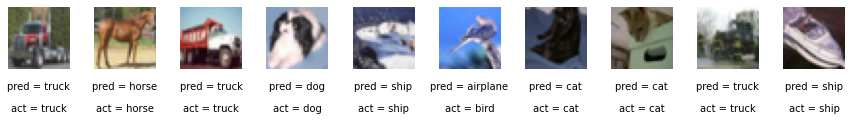

In [76]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
                   'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test) # (10000, 10) 크기의 배열, 샘플마다 10개의 클래스 확률을 담은 벡터
preds_single = CLASSES[np.argmax(preds, axis=-1)] # argmax 함수를 사용해 하나의 예측 결과 출력, axis=-1은 마지막 차원으로 배열을 압축한다는 의미
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10,
           ha = 'center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10,
           ha = 'center', transform=ax.transAxes)
    ax.imshow(img)